In [2]:
import numpy as np
import pandas as pd
# import pygal
import math
import IPython # not sure i really use this 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

import importlib
# import svgutils 
# from svgutils.compose import *
#import svgwrite

#def svgreload(): 
    #!osascript -e 'tell application "Google Chrome" to tell the active tab of second window to reload'

In [3]:
gdf = pd.read_csv('/Users/angueyraaristjm/Documents/LiImaging/TwoPhoton/ptf1a_gCaMP_Example/FigureStuff/20210303_12_34_35_ptf1a_gcamp_L01_XYT_ch_3RO1_results02.csv')
gdf.head(10) # returns a number of rows

,,Area1,Mean1,Min1,Max1,Area2,Mean2,Min2,Max2,Area3,...,Min5,Max5,Area6,Mean6,Min6,Max6,Area7,Mean7,Min7,Max7
0,1,186,14403.021,1969,33506,140,11619.621,2277,32921,160,...,708,26983,102,18214.422,5723,36706,6406,2704.060,31,9938
1,2,186,13678.828,1493,33488,140,11750.150,2614,25524,160,...,1934,27335,102,15764.951,2588,29522,6406,2679.467,245,9641
2,3,186,14191.769,1483,30028,140,11556.600,2249,22903,160,...,1605,22071,102,13855.932,3673,26262,6406,2654.602,999,7225
3,4,186,14235.436,2777,32881,140,11323.664,794,27239,160,...,3095,21522,102,14408.893,5117,26028,6406,2643.477,469,9103
4,5,186,13620.511,2821,28955,140,11639.336,2161,27130,160,...,2595,23567,102,14257.284,3756,24976,6406,2625.972,496,8618
5,6,186,14380.807,2534,38430,140,11339.543,534,22630,160,...,2295,23880,102,14207.971,3713,24364,6406,2629.875,91,6542
6,7,186,14695.833,2254,38481,140,11229.136,1520,29686,160,...,1207,24090,102,14204.088,2691,25823,6406,2616.981,268,9443
7,8,186,13793.930,1090,28652,140,11561.064,2169,27283,160,...,2248,24492,102,13581.932,5507,24438,6406,2600.222,183,8890
8,9,186,13704.500,825,33066,140,12006.164,1972,33882,160,...,1252,26909,102,13802.794,5423,27113,6406,2610.446,889,7820
9,10,186,13453.113,1952,28879,140,12204.436,1649,27849,160,...,1632,26541,102,13714.000,2141,24861,6406,2631.604,556,10483


In [4]:
dt = 1.525878906250; # frames per second
t = np.divide(range(0,len(gdf)),dt) # dividing the number of frames by frames per second to get time. This was subtracted by 20, not sure why. 
#print(t)

background = np.average(gdf.Mean7.values) # background is roi7

# subtract background
roi1 = gdf.Mean1.values - background
roi2 = gdf.Mean2.values  - background
roi3 = gdf.Mean3.values - background
roi4 = gdf.Mean4.values - background
roi5 = gdf.Mean5.values - background
roi6 = gdf.Mean6.values  - background
roi7 = gdf.Mean7.values  - background
#roi8 = gdf.Mean8.values  - background
# roi9 = gdf.Mean9.values  - background
# roi10 = gdf.Mean10.values  - background

# calculate df/f
# fold change = (final - initial)/initial or (final / initial) - 1 
limits=[25,58] #frames from a "steady state" after laser response 
roi1 = np.divide(roi1,np.average(roi1[limits[0]:limits[1]]))-1
roi2 = np.divide(roi2,np.average(roi2[limits[0]:limits[1]]))-1
roi3 = np.divide(roi3,np.average(roi3[limits[0]:limits[1]]))-1
roi4 = np.divide(roi4,np.average(roi4[limits[0]:limits[1]]))-1
roi5 = np.divide(roi5,np.average(roi5[limits[0]:limits[1]]))-1
roi6 = np.divide(roi6,np.average(roi6[limits[0]:limits[1]]))-1
roi7 = np.divide(roi7,np.average(roi7[limits[0]:limits[1]]))-1
#roi8 = np.divide(roi8,np.average(roi8[limits[0]:limits[1]]))-1
# roi9 = np.divide(roi9,np.average(roi9[limits[0]:limits[1]]))-1
# roi10 = np.divide(roi10,np.average(roi10[limits[0]:limits[1]]))-1

In [5]:
#Creating the light stim on graph 
lsX = [40,45] ## light stim time frames
lsY = [.75,.75]

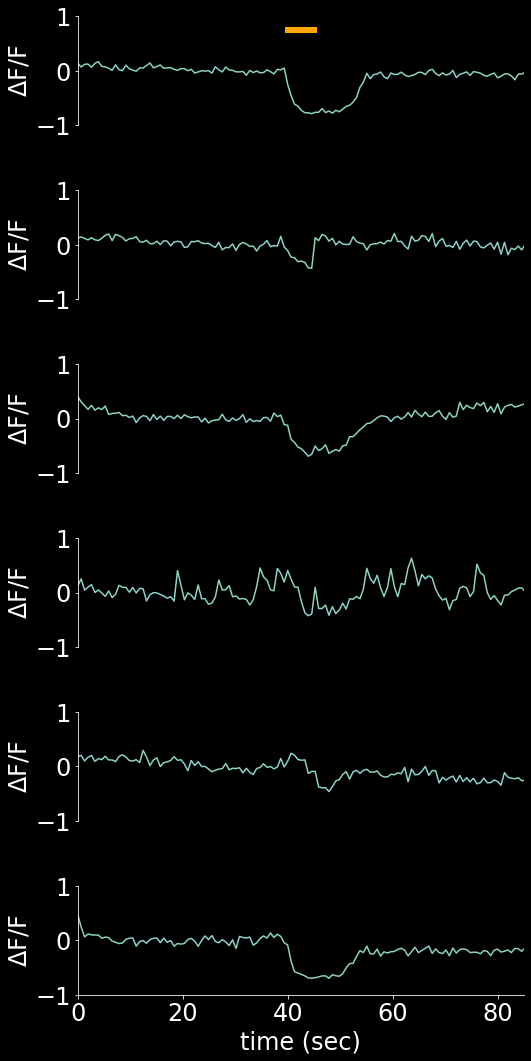

In [13]:
# multiple subplot figure
font = {'size' : 24}
matplotlib.rc('font', **font)

plt.style.use('dark_background') 
fig, ax = plt.subplots(7,1,figsize=(8,18)) #9 rows, 1 column

ax = plt.subplot(611)# (#rows, #col, Index )
ax.spines['top'].set_visible(False) # to get rid of the borders 
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
#ax.spines['left'].set_visible(False)
plt.plot(t,roi1)
plt.ylim(-1, 1)
plt.xlim(0, 85)
plt.ylabel(r'$\Delta$F/F')
plt.plot(lsX, lsY, linewidth=6, color ="orange")
# ax.set_title("ROI 1")
            
plt.xticks([])
#plt.yticks([0,2])

ax = plt.subplot(612) # (#rows, #col, Index )
ax.spines['top'].set_visible(False) # to get rid of the borders 
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
#ax.spines['left'].set_visible(False)
plt.plot(t,roi2)
plt.ylim(-1, 1)
plt.xlim(0, 85)
plt.ylabel(r'$\Delta$F/F')
# plt.plot(lsX, lsY, linewidth=6, color ="orange")
# ax.set_title("ROI 2")
plt.xticks([])
#plt.yticks([0,2])

ax = plt.subplot(613)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
plt.plot(t,roi3)
plt.ylim(-1, 1)
plt.xlim(0, 85)
plt.ylabel(r'$\Delta$F/F')
# plt.plot(lsX, lsY, linewidth=6, color ="orange")
# ax.set_title("ROI 3")
plt.xticks([])
#plt.yticks([0,2])

ax = plt.subplot(614)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
plt.plot(t,roi4)
plt.ylim(-1, 1)
plt.xlim(0, 85)
plt.ylabel(r'$\Delta$F/F')
# plt.plot(lsX, lsY, linewidth=6, color ="orange")
# ax.set_title("ROI 4")
plt.xticks([])
#plt.yticks([0,2])
#plt.xlabel('time (sec)')

ax = plt.subplot(615)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
plt.plot(t,roi5)
plt.ylim(-1, 1)
plt.xlim(0, 85)
plt.ylabel(r'$\Delta$F/F')
# plt.plot(lsX, lsY, linewidth=6, color ="orange")
# ax.set_title("ROI 5")
plt.xticks([])
#plt.yticks([0,2])
# plt.xlabel('time (sec)')

ax = plt.subplot(616)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.plot(t,roi6)
plt.ylim(-1, 1)
plt.xlim(0, 85)
plt.ylabel(r'$\Delta$F/F')
# plt.plot(lsX, lsY, linewidth=6, color ="orange")
# ax.set_title("ROI 6")
#plt.xticks([])
#plt.yticks([0,2])
plt.xlabel('time (sec)')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.6)

filename = '20210303_12_34_35_ptf1a_gcamp_L01_XYT_ch_3RO1_results1236_02' 
# the plot saves in whatever directory your are currently in. Or you can add a different path to save it to. 
#plt.savefig("{0}.png".format(filename + '_CalciumTransient'), format = "png") #can change quaility of the image by setting the dpi           
plt.savefig("{0}.svg".format(filename + '_CalciumTransient'), transparent=True, format="svg")

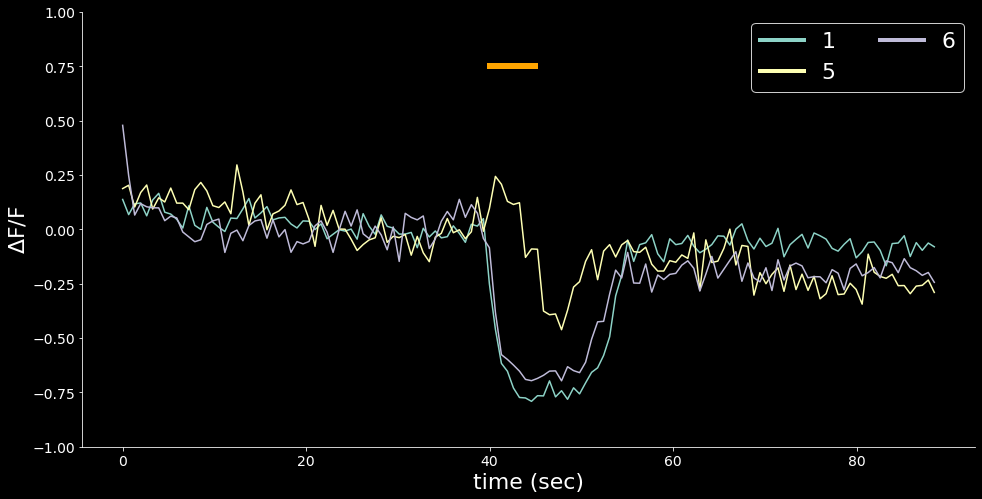

In [19]:
#Plot of all the traces on one graph: 
plt.style.use('dark_background') 

fig, ax = plt.subplots(figsize=(16,8)) # fills the rows first, then goes to columns. (width, height)

cfont = {'fontname' : 'Calibri'} ## can call other fonts here 

font_path = 'C:/Users/pataklk/Documents/Frag_Analysis_Code/Avenir.ttc'

# this plots them all on the same axes
ax.plot(t,roi1, label='1')
#ax.plot(t,roi2, label='2')
#ax.plot(t,roi3, label='3')
#ax.plot(t,roi4, label='4')
ax.plot(t,roi5, label='5')
ax.plot(t,roi6, label = '6')
#ax.plot(t,roi7, label = '7') # does change much 
#ax.plot(t,roi8, label = '8') ## doesnt really change much 
#ax.plot(t,roi9, label='9')
#ax.plot(t,roi10, label='10')

ax.plot(lsX, lsY, linewidth=6, color = 'orange') 

ax.set_ylim([-1, 1])
plt.ylabel(r'$\Delta$F/F', size=22)
plt.xlabel('time (sec)', size=22)

#ax.set_title("Pre-Israd", size = 40, **cfont)

ax.spines['top'].set_visible(False) # to get rid of the borders 
ax.spines['right'].set_visible(False)

leg = plt.legend(loc='upper right', frameon=True, ncol=2, framealpha=1, fontsize=22)
#ax.legend(loc='upper right', frameon=True, ncol=2, framealpha=0, fontsize=22) # frame alpha is the transparency 
for line in leg.get_lines():
    line.set_linewidth(4)
    
#ax.legend()
#ax.legend(loc='upper right', frameon=True, ncol=2, framealpha=0) # frame alpha is the transparency 

filename = '20210303_12_34_35_ptf1a_gcamp_L01_XYT_ch_3RO1_results1236_02' 
# the plot saves in whatever directory your are currently in. Or you can add a different path to save it to. 
#plt.savefig("{0}.png".format(filename + '_CalciumTransient'), format = "png") #can change quaility of the image by setting the dpi           
plt.savefig("{0}.svg".format(filename + '_CalciumTransientAll'), transparent=True, format="svg")